<a href="https://colab.research.google.com/github/maanpooja/hello-world/blob/master/Corpus_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from bs4 import BeautifulSoup

import re

import requests
import urllib.request
from urllib.request import urlopen

enter your corpus nameMusk
url: https://www.google.co.in/search?q=Musk&num=20
Response: <Response [200]>
soup: <!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="AjoCq8Zg5PcXgfl/SoTikc1e/dzQCdxW0fvo8FxmdXtMpTHFSPThDszr2GTn4aDO9n/lpkW3Zv/js+E6AktuqgkAAABveyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IkxvbmdBbmltYXRpb25GcmFtZVRpbWluZyIsImV4cGlyeSI6MTcwOTY4MzE5OSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Musk - Google Search</title><script nonce="veDPWEt8XnfX36DIDG_k9A">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElem
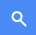
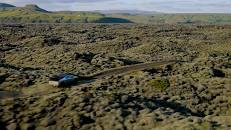
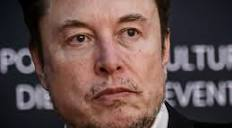
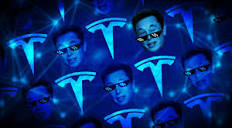

In [10]:
search_item = input("enter your corpus name")                          #Ask user to enter the corpus name
url = ("https://www.google.co.in/search?q=" + search_item + "&num=20")  #fetch first 20 urls from google search engine
print("url:",url)
urls1=[]
response = requests.get(url)                                            #which contains a server's response to an HTTP request.
print("Response:",response)
soup = BeautifulSoup(response.text,"html.parser")                       #contain Html Code of all the urls
print("soup:", soup)
for item in soup.find_all("href"):                                      #scraping the data from cite tag which only contain url
    if "youtube" in item.text:                                         #remove youtube url from all urls
        continue
    elif "twitter" in item.text:                                        #remove twitter url from all urls
        continue
    elif "https://" in item.text:                                      # remove non urls form of data
        urls1.append(item.text)
    else:
        continue                                                         #else continue

print(urls1)                                                            #print all the cleaned urls

In [6]:
data = ""                                                                    #created variable to store complete extract/scrap data
document = []                                                                # created a list of document
count = 0                                                                    #to count number of urls or document
with open("/content/" + search_item + ".txt",'w+') as MyFile:    #create a text file on the desktop
    for link in urls1:                                                        # scrap data one by one from each url
        url = link
        count = count + 1
        docs = ''
        try:                                                                 #help to remove error link which not allow
                                                                             #  to access the link or give http errors
            page = requests.get(url)
            soup = BeautifulSoup(page.content,'html.parser')                   #get Html code of each of the url
            for p in soup.find_all('p'):                                     #get data only from the p tag in html code #Datacleaning
                data = data + p.text + "\n\n"
                docs = docs + p.text + "\n\n"
                MyFile.write(p.text + "\n\n")
        except:                                                               # detect all kind error that has give by interpreter
            continue                                                           #make it run the code #let it go
        document.append(docs)                                                # divide data into different documents based on different urls

In [7]:
print(data)                                                   # print data stored in variable  'data'

In [ ]:
print(count)                                                   # print the number of document considered

In [ ]:
print(document[8])                                              # print the sample of document

In [ ]:
with open("/home/poojamaan/Desktop/Corpus Generation/" + search_item + ".txt",'w+') as MyFile:
    data1 = MyFile.read()                                                     # used for reading file data
    pattern = re.compile(r'(\[|\()\w*(\)|\])')                                # pattern to remove square bracket
    MyFile.write(pattern.sub('',data)+"\n\n")                                 # writing cleaned data in file
    data = (pattern.sub('',data1)+"\n\n")                                     # writing cleaned data in data variable

In [ ]:
# with open("/home/poojamaan/Desktop/Corpus Generation/" + search_item + ".txt",'r') as MyFile:
#     data1 = MyFile.read()
#     pattern = re.compile(r'(\[|\()\w*(\)|\])')
#     data = (pattern.sub('',data1)+"\n\n")

In [ ]:
print(data)                                                                # print global variable

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stoplist = stopwords.words('english')                                       # create a list of stopwords
CleanToken = set()                                                          # made a set to remove all the repeat tokens
with open("/home/poojamaan/Desktop/Corpus Generation/" + search_item + ".txt",'r+') as MyFile:
    Data = MyFile.read()
#     print(word_tokenize(Data))
    allToken = word_tokenize(Data)                                             # performing word tokenization
    print(len(allToken))

    for token in allToken:                                                    # rem0ving unnecesary tokens like ',' '.' '[' & ']'
        pattern = re.compile(r'(\.|\"|\,|\:|\;|\'s|\'|\""|\?|\(|\)|\[|\]|\_|\-|\&|\@)')
        report = pattern.sub('',token)                                       # using re to convert unnecessary token into empty string
        if report == '':                                                     # removing empty string
            continue
        else:
            if report.lower() not in stoplist:                                # removing stopwords
                if re.search('([a-z|A-Z|1-9|\[|\]])', report):                 # keeping only English words
                     CleanToken.add(report)
    print(CleanToken)

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

with open("/home/poojamaan/Desktop/Corpus Generation/" + search_item + ".txt",'r+') as MyFile:
    Data = MyFile.read()
    #print(word_tokenize(tokenData))                                     # sentence tokenization
    allToken = sent_tokenize(Data)
    print(len(allToken))

In [ ]:
import nltk
tagged = nltk.pos_tag(CleanToken)
NN = []                                                                  # list of nouns
VRB = []                                                                  # list of verbs
JJ = []                                                                     # list of adjectives
for pos in tagged:
    if (pos[1] == 'NN'or pos[1] == 'NNP' or pos[1] == 'NNS'):
        NN.append(pos[0].lower())
    elif "V" in pos[1]:
        VRB.append(pos[0].lower())
    elif pos[1] == 'JJ':
        JJ.append(pos[0].lower())
#elif (pos[1] == 'VBD'or pos[1] == 'VB' or pos[1] == 'VBZ' or pos[1] == 'VBP')

print("NOUNS:\n"+ str(NN) + "\n\n\n")
print("VERBS:\n "+ str(VRB) + "\n\n\n")
print("ADJECTIVES:\n "+ str(JJ) + "\n\n\n")

In [ ]:
import fileinput                                                      # package to take input from the user
key = input("Enter the word that you want to search : ")
key = key.lower()                                                     # converting user input into lowercase
count = 0                                                             # to print document number where the word is present
for i in document:                                                    # taking data from each document to compare key word
    count = count + 1                                                 # count document number
    content = i                                                        # assining document content
    list_of_sentences = content.split("\n\n")                        # making list of paragraph from document
    # print(list_of_sentences)
    for sentence in list_of_sentences:                                # comparing key word with each paragraph
    #     print(sentence)
        words = sentence.split(" ")                                    # making list of word from each paragraph
    #     print(words)
        for word in words:                                             # taking each word
            word = word.lower()                                        # converting word in lowercase
            if word == key:                                           # comparing each word with key word
                print("document :",count)                             # printing respected document number for that word
                cross = sentence.split(" ")
                for data in cross:
                    data = data.lower()
                    if data == key:
                        print("\033[1;34;41m"+ data,end =" ")        # printing highlighted key word
                    else :
                        print("\033[1;32;m"+ data,end =" ")             # printing other words

                print("\n")
#                 print("document :",count)
#                 print(sentence)
                break                                                 # changing paragraph if once the key word is found

In [ ]:
with open("/home/poojamaan/Desktop/Corpus Generation/" + search_item + ".txt",'w+') as MyFile:
    pattern3 = re.compile(r'(\d*\s*(January| February| March|April|May|June|July|August|September|October|November|December)\s*\d*)')
    MyFile.write(pattern3.sub('DATE',data))                                # replacing date format with string DATE

In [ ]:
with open("/home/poojamaan/Desktop/Corpus Generation/" + search_item + ".txt",'w+') as MyFile:
    pattern3 = re.compile(r'(\d\d\d\d)')
    MyFile.write(pattern3.sub('YEAR',data))                              # replacing year format with string YEAR